### Import all the required libraries

In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import fashion_mnist
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # Make the figures a bit bigger


In [3]:
nb_classes = 10
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
print("X_train original shape", train_images.shape)
print("y_train original shape", train_labels.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [10]:
train_labels[0]

9

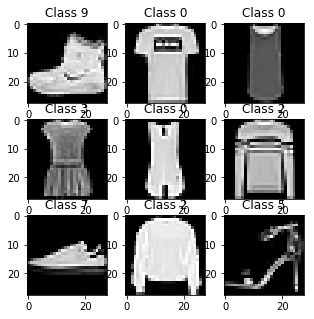

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(train_labels[i]))

In [8]:
train_tensor = train_images.reshape(60000, 784)
test_tensor = test_images.reshape(10000, 784)

train_tensor = train_tensor.astype('float32')
test_tensor = test_tensor.astype('float32')

train_tensor /= 255
test_tensor /= 255

In [7]:
train_labels_tensor = np_utils.to_categorical(train_labels, nb_classes)
test_labels_tensor = np_utils.to_categorical(test_labels, nb_classes)

In [12]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='mse', metrics=['accuracy'])

In [14]:
model.fit(train_tensor, train_labels_tensor, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0623 - acc: 0.5468
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0409 - acc: 0.7261
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0311 - acc: 0.8003
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0283 - acc: 0.8150
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0267 - acc: 0.8251
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0255 - acc: 0.8326
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0246 - acc: 0.8382
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0239 - acc: 0.8419
Epoch 9/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0233 - acc: 0.8457
Epoch 10/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0228 - acc: 0.8488

In [15]:
score = model.evaluate(test_tensor, test_labels_tensor)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 40us/step
Test score: 0.024194039018452167
Test accuracy: 0.8365


In [16]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(test_tensor)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == test_labels_tensor)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels_tensor)[0]

/home/ouser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/home/ouser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  import sys


In [21]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_tensor[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels_tensor[correct]))


<Figure size 360x360 with 0 Axes>

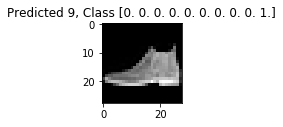

In [22]:

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_tensor[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels_tensor[incorrect]))